In [144]:
import numpy as np 
import torch
import torchvision
from torchvision import transforms
import torch.nn as nn
import matplotlib.pyplot as plt 
from nn_helper import *

torch.manual_seed(1)

# Download and load the training set
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5), std=(0.5))])
trainset = torchvision.datasets.MNIST(root="data", download=True, transform = transform)

# Create a DataLoader to efficiently load the data in Instancees
batch_size = 64
data_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, drop_last = True)

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using '{device}' device.")

gen_input_size = 100 
image_size = (28, 28)
n_filters_gen = 128
n_filters_dis = 128

generator = Generator(100, n_filters_gen)
generator.load_state_dict(torch.load("WGAN_params/gen-params-10"))

Using 'cuda' device.


<All keys matched successfully>

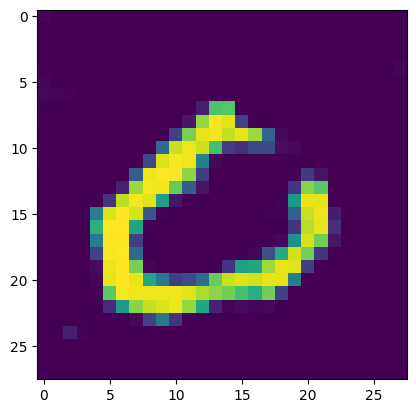

In [166]:
noise = create_noise(1, 100)
image = generator(noise).squeeze().detach().numpy()
image = (image * 0.5) + 0.5

# print(noise[0][0][0][0].item())
plt.imshow(image)